<a href="https://colab.research.google.com/github/AmruthaA27/Task-13--KNN-Algorithm/blob/main/ML_SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

**Importing the dataset**

In [13]:
df_data = pd.read_csv('Social_Network_Ads.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_data['Gender'])
df_data.drop("Gender", axis=1, inplace=True)
df_data["Gender"] = label
df_data

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


**Splitting the dataset into the Training set and Test set**

In [30]:
X = df_data[["EstimatedSalary"]]
Y = df_data[['Purchased']]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 4)

**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
#y = np.array(Y)
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(Y)

**Fitting SVM to the Training set**

In [33]:
from sklearn.svm import SVR
SVM_model = SVR(kernel = 'rbf')
SVM_model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Predicting the Test set results**

In [34]:
y_pred = SVM_model.predict(x_test)

y_pred_bin = []
for value in y_pred:
  if value<0.5:
    y_pred_bin.append(0)
  else:
    y_pred_bin.append(1)

y_pred_arr = np.array(y_pred_bin)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Making the Confusion Matrix**

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_arr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

**Visualising the Training set results**

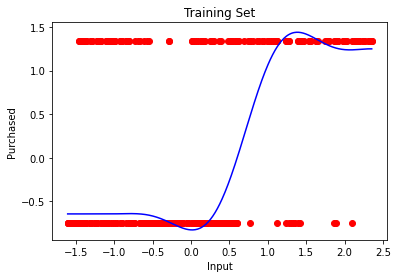

In [36]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, SVM_model.predict(X_grid), color = 'blue')
plt.title('Training Set')
plt.xlabel('Input')
plt.ylabel('Purchased')
plt.show()